# We are analysts at Crankshaft List. Hundreds of free advertisements for vehicles are published on my site every day. We will study data collected over the last few years and determine which factors influence the price of a vehicle.

### Table of Contents

* [Data Preprocessing](#chapter1)
    * [Import Libraries](#section_1_1)
    * [open data file](#section_1_2)
    * [copy the data](#section_1_3)
    * [study the general info](#section_1_4)
    * [dealing with missing values](#section_1_5)
    * [convert dtypes](#section_1_6)
    * [double check preprocessing](#section_1_7)
    
* [Calculate and add to the table](#chapter2)
    * [Day of week, month year the ad was placed](#section_2_1)
    * [Age of vehicle](#section_2_2)
    * [Average miles per year](#section_2_3)
    * [Replace condition to numeric](#section_2_4)

* [EDA](#chapter3)
    * [Day of week, month year the ad was placed](#section_3_1)
    * [Determine the upper limits of outliers](#section_3_2)
    * [Use the filtered data to plot new histograms](#section_3_3)
    * [Study how many days advertisements were displayed](#section_3_4) 
    * [Analyze the number of ads and the average price for each type of vehicle](#section_3_5)
    * [What factors impact the price most?](#section_3_6) 
* [Final conclusion](#chapter4)

1. first i will import the libraries needed to complete the project
2. open the data file.
3. study the general information from the data file.
4. identify and study missing values.
5. convert the data to the required types.
**that concludes the first part - the data preprocessing.**

6. calculate and add to the table the following:
 - day of the week, month, and year the ad was placed.
 - the vehicle's age in years when the ad was placed.
 - the vehicle avarge mileage per year.
7. in the 'condition' column, replace the string values with a numeric scale of 0-5.
8. carry out exploratory data anlysis.
9. an overall conclusion.

### Data Preprocessing: <a class="anchor" id="chapter1">

### Import libraries:<a class="anchor" id="section_1_1">

In [1]:
#1. import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Open data file: <a class="anchor" id="section_1_2">

In [2]:
#2. open the data file
try: df = pd.read_csv('C:/Users/priel/Downloads/vehicles_us.csv')
except: df = pd.read_csv('/datasets/vehicles_us.csv')

### Copy the data: <a class="anchor" id="section_1_3">

In [3]:
#create a copy of the df
data = df.copy()

### Study the general info: <a class="anchor" id="section_1_4">

In [4]:
#3. study the genral information
data.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
29267,12800,NaN,ford f-150,excellent,6.0,gas,161000.0,automatic,truck,white,1.0,2019-03-26,18
11397,1,2018.0,ford f-150,excellent,6.0,gas,17269.0,automatic,truck,silver,NaN,2018-06-01,5
10148,21900,2018.0,nissan frontier crew cab sv,good,6.0,gas,27576.0,other,pickup,white,1.0,2018-09-29,14
33778,3199,2006.0,ford fusion se,good,4.0,gas,NaN,automatic,sedan,red,NaN,2018-07-08,23
17392,8500,2011.0,honda accord,like new,NaN,gas,97000.0,automatic,sedan,blue,NaN,2018-11-04,13


In [5]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [7]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [8]:
data.tail(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


## there are number of problems to adress in the data:
 - missing values in 'model_year', 'cylinders', 'odometer', 'paint_color' and 'is_4wd'.
 - number of dtypes to be changed:
 'model_year' flt -> int
     'cylinders' flt -> int
     'odometer' flt -> int
     'is_4wd' flt -> bool
     'date_posted' obj -> datetime
 
**there are more problems to adress, such as a price of 1 USD(min price), we'll get to that when going over each column**

**it's importent to remember how the data was collected - in this case, almost all the values we see came from the advertiser. it means that the fact that a color is not specified can have an effect on other values such as days_listed - same case for odometer/model_year, a buyer might not want to call a seller to ask about paint and mileage.**

### Dealing with missing values: <a class="anchor" id="section_1_5">

In [9]:
data['model_year'].isnull().sum()

3619

In [10]:
len(data['model_year'].unique())

69

In [11]:
data.loc[data['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [12]:
(data['model_year'].isnull().sum()) / (len(data))

0.07023774866569626

**roughly 7% of the column is missing.**
<br>i can't seem to find a pattern in the missing values of this column.**MAR (Missing at random)**
<br>one way to fill it could be by calculting the avarage mileage per year for each type of vehicle(in the non missing) and then fill in the model_year by the mileage of each missing value.
<br>another way is to fill in the most popular year for each model.
<br>this time I'll go with the letter.

### Finding most popular year for each model to fill the NaN:

In [13]:
#group the data by model and calculate the most popular years for each model
year_group = data.groupby('model')['model_year'].agg(lambda s: s.mode()[0])

In [14]:
#function that fill in null values with the most popular year for the model
def yearfill(row):
    year = row['model_year']
    if pd.isnull(year):
        return year_group[row['model']]
    else:
        return row['model_year']

In [15]:
#apply method on the column
data['model_year'] = data.apply(yearfill, axis=1)

In [16]:
#checking
data['model_year'].isnull().sum()

0

**still on 4. indetify and study missing values - 'cylinders'**

In [17]:
data['cylinders'].isnull().sum()

5260

In [18]:
data['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [19]:
data.loc[data['cylinders'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


In [20]:
data['cylinders'].isnull().sum() / len(data)

0.10208636584182436

**roughly 10% of the column is missing**
<br>again, i can't see a distinctive pattern in the missing values entries.**MCAR**
<br>i will filled those missing values with the mean number of cylinders for type and year.

In [21]:
data['filled_cyl'] = data.groupby(['model', 'model_year'])['cylinders'].transform(lambda grp: grp.fillna(np.mean(grp)))

In [22]:
#checking
data['filled_cyl'].isnull().sum()

26

since some missing values have unique keys(model and year), there are still some NaN left.

In [23]:
data['filled_cyl'].value_counts()

8.000000     16438
6.000000     16278
4.000000     14575
10.000000      550
5.000000       289
             ...  
5.222222         1
5.454545         1
8.545455         1
3.714286         1
8.857143         1
Name: filled_cyl, Length: 524, dtype: int64

In [24]:
#to tidy tha table a bit i'll round this means
data['filled_cyl'] = data['filled_cyl'] // 1

In [25]:
data['filled_cyl'].value_counts()

6.0     16916
8.0     16557
4.0     15414
7.0      1136
5.0       808
10.0      550
3.0        96
9.0        20
12.0        2
Name: filled_cyl, dtype: int64

In [26]:
data['filled_cyl'].describe()

count    51499.000000
mean         6.089283
std          1.644874
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: filled_cyl, dtype: float64

mean and median are the same, for the missing values left - i choose to fill with the median

In [27]:
#filling the missing values left with new median.
data['filled_cyl'] = data['filled_cyl'].fillna(value = data['filled_cyl'].median())

In [28]:
#checking
data['filled_cyl'].isnull().sum()

0

i could delete the missing values left, as well, i choose to fill them with the median.

**still on 4. identify and study missing values - 'odometer'**

In [29]:
data['odometer'].isnull().sum()

7892

In [30]:
data.loc[data['odometer'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,filled_cyl
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,8.0
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111,8.0
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39,6.0
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40,4.0
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69,8.0
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31,8.0
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51,6.0
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89,4.0


In [31]:
data['odometer'].isnull().sum() / len(data)

0.15316836487142163

**over 15% of this column is missing, the highest missing share yet.**
<br>again, no pattern - **MAR**, though there's got to be some correlation with other columns such as year.
<br>we can fill in those missing values with the average 'odometer' per year, by type.

In [32]:
#filling the missing values with the mean odometer for the type and year
data['filled_odo'] = data.groupby(['type', 'model_year'])['odometer'].transform(lambda grp: grp.fillna(np.mean(grp)))

In [33]:
#checking
data['filled_odo'].isnull().sum()

8

In [34]:
#since some missing value have unique keys(type and year), some NaN are left, I'll fill thos with the general mean odometer
data['filled_odo'] = data['filled_odo'].fillna(value=data['filled_odo'].mean())

In [35]:
#checking
data['filled_odo'].isnull().sum()

0

**still on 4. identify and study missing values - 'paint_color'**

In [36]:
data['paint_color'].isnull().sum()

9267

In [37]:
data.loc[data['paint_color'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,filled_cyl,filled_odo
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,6.0,145000.000000
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,8.0,170871.082524
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,4.0,104174.000000
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37,8.0,140742.000000
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8,6.0,154000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,NaN,2019-04-01,175,4.0,111088.000000
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73,4.0,100780.000000
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25,6.0,49225.000000
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89,4.0,50264.186813


In [38]:
data['paint_color'].isnull().sum() / len(data)

0.17985443959243086

In [39]:
data['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

**almost 18% of this column is missing**
<br>again, no pattern.**MCAR**
<br>when considering the way the data is gathered we can understand a bit more about this column. the fact that a color was not specified in an ad can actually affect other columns, such as days_listed, since a buyer likes to know the color of the car he intend to buy.
<br>with that being said, i will fill the missing with the str 'unspecified'

In [40]:
data['paint_color'].fillna(value="unspecified", inplace=True)

In [41]:
#checking
data['paint_color'].isnull().sum()

0

**still on 4. identify and study missing values - 'is_4wd'**

In [42]:
data['is_4wd'].isnull().sum()

25953

In [43]:
data['is_4wd'].isnull().sum()/len(data)

0.5036972343522562

In [44]:
 data['is_4wd'].unique()

array([ 1., nan])

**more than half of this column is missing**
<br>this one is **MNAR** since we can see that the only value not missing is 1, we can safely assume that this means that the missing values are simply a 0 in this column.
<br>i will fill those missing values with 0 now.

In [45]:
data['is_4wd'].fillna(value=0, inplace=True)

In [46]:
#checking
data['is_4wd'].isnull().sum()

0

**Thus far, We've identyfied, studied and filled the missing values with the following values:**
 - 'model_year' : by the most common year for the model.
 - 'cylinders' : by the average cylinders number for the model and model_year.
 - 'odometer' : by the average mileage for type and year.
 - 'is_4wd' : by 0, since the only nun null was 1, the NaN are simply False value.
 - 'paint_color' : by "unspecified", since these are what they are. the advertiser chose to not specify the color.

### Convert data types <a class="anchor" id="section_1_6">

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  filled_cyl    51525 non-null  float64
 14  filled_odo    51525 non-null  float64
dtypes: float64(6), int64(2), object(7)
memory usage: 5.9+ MB


  - 'model_year': flt -> int
  - 'cylinders': flt -> int
  - 'odometer': flt -> int
  - 'is_4wd': flt -> bool 
  - 'date_posted': obj -> datetime
  - 'filled_odo' : flt -> int
  - 'filled_cyl' : flt -> int

In [48]:
data['model_year']= data['model_year'].astype('int')

In [49]:
# I will fill the NaN in 'cylinders' with zero just for complition sake
data['cylinders']= data['cylinders'].fillna(value=0)
data['cylinders']= data['cylinders'].astype('int')

In [50]:
# I will fill the NaN in 'odometer' with zero just for complition sake
data['odometer']= data['odometer'].fillna(value=0)
data['odometer']= data['odometer'].astype('int')

#### those missing values are the ones that were left in the original columns. when i filled the missing values with mean by type an year i actually saved the new, filled values in a new columns (filled_odo, filled_cyl).
the reason i did it was to keep the source so if i will want to compare my result with the original data i could do it.

In [51]:
data['is_4wd']= data['is_4wd'].astype(bool)

In [52]:
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d') 

In [53]:
data['filled_odo'] = data['filled_odo'].astype(int)

In [54]:
data['filled_cyl'] = data['filled_cyl'].astype(int)

In [55]:
#checking all changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  filled_cyl    51525 non-null  int32         
 14  filled_odo    51525 non-null  int32         
dtypes: bool(1), datetime64[ns](1), int32

In [56]:
data.describe()

,price,model_year,cylinders,odometer,days_listed,filled_cyl,filled_odo
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000
mean,12132.464920,2009.871033,5.499932,97854.326948,39.55476,6.089238,115539.228666
std,10040.803015,6.145084,2.431985,72940.007970,28.20427,1.644460,62035.701135
min,1.000000,1908.000000,0.000000,0.000000,0.00000,3.000000,0.000000
25%,5000.000000,2007.000000,4.000000,35896.000000,19.00000,4.000000,73007.000000
50%,9000.000000,2011.000000,6.000000,99114.000000,33.00000,6.000000,114700.000000
75%,16839.000000,2014.000000,8.000000,146541.000000,53.00000,8.000000,152525.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,12.000000,990000.000000


### Double check the preprocessing: <a class="anchor" id="section_1_7">

Before continuing to the next part, I'd like to exemine the result of the data preprocessing and determine if there are other issues to adress.
to do so, I will go over each column and study its values.

In [57]:
data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [58]:
data.query('price<10')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,filled_cyl,filled_odo
405,1,2014,chevrolet camaro,excellent,6,gas,71310,automatic,coupe,unspecified,False,2018-07-14,29,6,71310
3063,1,1998,chevrolet silverado,good,8,gas,164000,automatic,pickup,unspecified,True,2018-10-11,49,8,164000
3808,1,2007,chevrolet tahoe,good,8,gas,200,automatic,SUV,red,False,2019-03-18,63,8,200
3902,1,1996,ford f-150,fair,0,gas,163000,manual,truck,white,False,2019-02-23,54,7,163000
4140,1,2004,chevrolet silverado,excellent,8,diesel,83000,automatic,pickup,unspecified,True,2019-02-04,14,8,83000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49709,1,2013,ford f150,excellent,8,gas,139700,other,pickup,red,True,2019-03-11,18,8,139700
50245,1,1986,chevrolet silverado,good,8,gas,0,automatic,truck,red,True,2018-11-30,50,8,123202
50393,1,2003,gmc sierra 2500hd,good,8,diesel,212300,automatic,pickup,black,True,2019-04-12,28,8,212300
50430,5,2011,toyota sienna,good,6,gas,0,automatic,SUV,green,False,2018-12-03,5,6,124834


the mean is over 30% larger then the median, I expect to see some outliers in the top values of this column.
<br>1% of the column is not very logical, for now, i will leave it, later on I'll consider droping those entries.
<br>**note:802 rows are listed with price<10**

#### one explanation i can think of is a human error when uploading an ad and missing a zero or something.
#### other explanation i can think is, like with the missing values in color column, the advertiser choose not to specify the real price thinking it can get him more potential buyers. 

In [59]:
data['model_year'].value_counts()

2013    4087
2014    3868
2012    3813
2015    3761
2011    3604
        ... 
1948       1
1961       1
1936       1
1949       1
1929       1
Name: model_year, Length: 68, dtype: int64

seems ok

In [60]:
data['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

In [61]:
data['model'].str.lower()

0                bmw x5
1            ford f-150
2        hyundai sonata
3            ford f-150
4          chrysler 200
              ...      
51520     nissan maxima
51521       honda civic
51522    hyundai sonata
51523    toyota corolla
51524     nissan altima
Name: model, Length: 51525, dtype: object

In [62]:
#checking if value counts changed
data['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

seems like this column is good, no duplicates with different cases

In [63]:
data['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

this column is good, no repairs needed

In [64]:
data['fuel'].value_counts()

gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

most of the cars in the data are gas fueled, no problems here

In [65]:
data['filled_odo'].describe()

count     51525.000000
mean     115539.228666
std       62035.701135
min           0.000000
25%       73007.000000
50%      114700.000000
75%      152525.000000
max      990000.000000
Name: filled_odo, dtype: float64

the average and median in this columns are close, meaning I don't expect to see any significant outliers here

In [66]:
data['filled_odo'].value_counts()

0         185
140000    183
108627    183
95893     182
120000    179
         ... 
82280       1
85261       1
24106       1
278600      1
139573      1
Name: filled_odo, Length: 18045, dtype: int64

In [67]:
data[data['filled_odo']<10]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,filled_cyl,filled_odo
352,7997,2009,gmc yukon,excellent,8,gas,0,automatic,SUV,white,True,2019-03-16,88,8,0
814,2995,1999,ford f-150,good,6,gas,0,manual,truck,unspecified,False,2019-03-14,16,6,0
1375,5888,2008,toyota 4runner,good,6,gas,0,automatic,SUV,black,False,2019-02-22,36,6,0
1461,1000,1992,gmc sierra 1500,good,8,gas,0,automatic,truck,unspecified,False,2018-09-28,47,8,0
1970,10988,2000,ford f-250 sd,good,8,diesel,0,automatic,truck,white,True,2018-11-21,39,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49284,3300,2002,hyundai santa fe,good,6,gas,0,automatic,wagon,white,True,2019-02-15,7,6,0
50412,25500,2012,jeep wrangler,good,6,gas,0,automatic,SUV,yellow,True,2018-06-12,48,6,0
50631,3600,2012,chrysler 200,good,4,gas,0,automatic,sedan,red,False,2018-07-24,90,4,0
50633,1800,2000,ford expedition,fair,8,gas,1,automatic,SUV,brown,False,2019-01-05,26,8,1


there are 185 entries with 0 odometer and 246 with less than 10.
this seems unreasonable since there are really low odometer cars that are not new.
for now i'll leave it like that.

In [68]:
len(data.query('filled_odo<10 & condition != "new"'))

219

**note: there are 219 rows with filled_odo<10 and are not "new"**

In [69]:
data['transmission'].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

most are automatic, no problems here

In [70]:
data['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

no weird values here

In [71]:
data['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

the average is 20% larger then the median, i expect some outliers in the top values of this column

### Data preprocessing completed.
#### notes:
 - 'price' have 802 rows less than 10 (non-logical)
 - 'filled_odo' (the new column with NaN odometer filled) have 246 row with value<10 and 219 of those are not 'new' condition.

### Calculate and add to the table: <a class="anchor" id="chapter2">

 - day of the week, month, and year the ad was placed.
 - the vehicle's age in years when the ad was placed.
 - the vehicle avarge mileage per year.

### Day of the week, month and year the ad was placed <a class="anchor" id="section_2_1">

In [72]:
data['dayofweek'] = pd.DatetimeIndex(data['date_posted']).weekday

In [73]:
data['month_posted'] = pd.DatetimeIndex(data['date_posted']).month

In [74]:
data['year_posted'] = pd.DatetimeIndex(data['date_posted']).year

In [75]:
#checking
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,filled_cyl,filled_odo,dayofweek,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unspecified,True,2018-06-23,19,6,145000,5,6,2018
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,6,88705,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,4,110000,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,0,automatic,pickup,unspecified,False,2019-03-22,9,8,170871,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,4,80903,1,4,2019
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,6,57954,2,6,2018
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,4,79212,3,12,2018
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,6,109473,0,1,2019
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unspecified,True,2018-07-16,19,4,104174,0,7,2018
9,9200,2008,honda pilot,excellent,0,gas,147191,automatic,SUV,blue,True,2019-02-15,17,6,147191,4,2,2019


### Age of the vehicle <a class="anchor" id="section_2_2">

In [76]:
data['age'] = data['year_posted'] - data['model_year']

In [77]:
#checking
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,filled_cyl,filled_odo,dayofweek,month_posted,year_posted,age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unspecified,True,2018-06-23,19,6,145000,5,6,2018,7
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,6,88705,4,10,2018,5
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,4,110000,3,2,2019,6
3,1500,2003,ford f-150,fair,8,gas,0,automatic,pickup,unspecified,False,2019-03-22,9,8,170871,4,3,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,4,80903,1,4,2019,2
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,6,57954,2,6,2018,4
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,4,79212,3,12,2018,3
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,6,109473,0,1,2019,6
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unspecified,True,2018-07-16,19,4,104174,0,7,2018,6
9,9200,2008,honda pilot,excellent,0,gas,147191,automatic,SUV,blue,True,2019-02-15,17,6,147191,4,2,2019,11


### Average miles per year <a class="anchor" id="section_2_3">

In [78]:
def miles_per_y(row):
    """Return miles per year"""
    age = row['age']
    odometer = row['filled_odo']
    if age > 0:
        return odometer // age
    else:
        return 0

i choose to use "//" to keep the result tidy, since a mile here or there won't make any difference in this case

In [79]:
data['miles_per_year'] = data.apply(miles_per_y, axis=1)

In [80]:
#checking
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,filled_cyl,filled_odo,dayofweek,month_posted,year_posted,age,miles_per_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unspecified,True,2018-06-23,19,6,145000,5,6,2018,7,20714
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,6,88705,4,10,2018,5,17741
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,4,110000,3,2,2019,6,18333
3,1500,2003,ford f-150,fair,8,gas,0,automatic,pickup,unspecified,False,2019-03-22,9,8,170871,4,3,2019,16,10679
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,4,80903,1,4,2019,2,40451
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,6,57954,2,6,2018,4,14488
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,4,79212,3,12,2018,3,26404
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,6,109473,0,1,2019,6,18245
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unspecified,True,2018-07-16,19,4,104174,0,7,2018,6,17362
9,9200,2008,honda pilot,excellent,0,gas,147191,automatic,SUV,blue,True,2019-02-15,17,6,147191,4,2,2019,11,13381


### Replace condition to numeric <a class="anchor" id="section_2_4">
**for this task I'll write a function to help me**

In [131]:
data['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [82]:
# a function that accept a string from 'condition' and returns a numeric 'condition_id'
def toNumeric(row):
    """Return a numeric scale of condition"""
    condition = row['condition']
    if condition == 'salvage':
        return 0
    if condition == 'fair':
        return 1
    if condition == 'good':
        return 2
    if condition == 'excellent':
        return 3
    if condition == 'like new':
        return 4
    if condition == 'new':
        return 5
    

In [83]:
data['condition_id'] = data.apply(toNumeric, axis=1)

In [84]:
#checking
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,filled_cyl,filled_odo,dayofweek,month_posted,year_posted,age,miles_per_year,condition_id
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unspecified,...,2018-06-23,19,6,145000,5,6,2018,7,20714,2
1,25500,2013,ford f-150,good,6,gas,88705,automatic,pickup,white,...,2018-10-19,50,6,88705,4,10,2018,5,17741,2
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,...,2019-02-07,79,4,110000,3,2,2019,6,18333,4
3,1500,2003,ford f-150,fair,8,gas,0,automatic,pickup,unspecified,...,2019-03-22,9,8,170871,4,3,2019,16,10679,1
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,...,2019-04-02,28,4,80903,1,4,2019,2,40451,3


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  int64         
 1   model_year      51525 non-null  int32         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  object        
 4   cylinders       51525 non-null  int32         
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  int32         
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  filled_cyl      51525 non-null  int32         
 14  filled_odo      51525 non-null  int32         
 15  da

#### We had 13 columns, 5 had missing values. we now have 21 columns - no missing values. we are ready for some EDA.

## changes made to the data so far:
**missing values filled:**
- 'model_year'(by most popular year of model)
- 'cylinders'(by average cylinders # for the model and year): saved to column 'filled_cyl'
- 'odometer'(by the average mileage for type and year): saved to column 'filled_odo'
- 'paint_color'("unspecified")
- 'is_4wd'(all missing turned to false).

**dtypes changes:** 
- 'model_year', 'cylinders', 'odometer', 'filled_odo', 'filled_cyl': float -> int.
- 'is_4wd': float -> bool.
- 'date_posted': object -> datetime

**new columns constructed:**
- filled_odo
- filled_cyl
- day of the week the ad published
- month the ad published
- year the ad published
- vehicle age(years)
- miles per year
- numeric expression of condition

### EDA <a class="anchor" id="chapther3">

### Study the following parameters: <a class="anchor" id="section_3_1">

**price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. 
<br>Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.**

**parameters to exemine:**
- price
- vehicle's age
- mileage
- number of cylinders
- condition

In [86]:
clean_df = data[['price','model_year','model','condition','condition_id','filled_cyl','filled_odo','type','paint_color','is_4wd','age','miles_per_year','days_listed']]

In [87]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           51525 non-null  int64 
 1   model_year      51525 non-null  int32 
 2   model           51525 non-null  object
 3   condition       51525 non-null  object
 4   condition_id    51525 non-null  int64 
 5   filled_cyl      51525 non-null  int32 
 6   filled_odo      51525 non-null  int32 
 7   type            51525 non-null  object
 8   paint_color     51525 non-null  object
 9   is_4wd          51525 non-null  bool  
 10  age             51525 non-null  int64 
 11  miles_per_year  51525 non-null  int64 
 12  days_listed     51525 non-null  int64 
dtypes: bool(1), int32(3), int64(5), object(4)
memory usage: 4.2+ MB


## Price

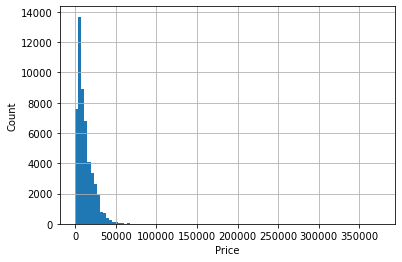

In [88]:
data['price'].plot(kind='hist',bins=100, grid=True)
plt.ylabel('Count')
plt.xlabel('Price')
plt.show()

In [89]:
data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

**The histogram is skewed to the right.
<br>We can see in the histogram that we have outliers at the upper limit of the values.
<br>Most of our values fall below 50000 and we can see a peak at around zero, we cannot trust this histogram since the outliers make it difficult to read it properly.
<br>We have to deal with the outliers before we can make any rational assumptions or conclusions.**

## Age

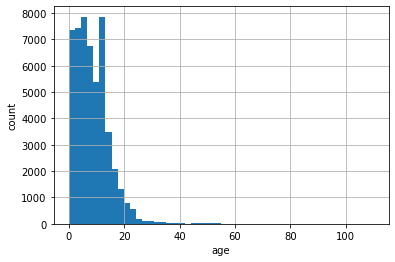

In [90]:
data['age'].plot(kind='hist', bins=50, grid=True)
plt.ylabel('count')
plt.xlabel('age')
plt.show()

**The histogram is also skewed to the right. There's a chance that it will look more bimodel when we'll deal with the outliers.
<br>We can see in the histogram that we have outliers at the upper limit of the values.
<br>Most of our values fall below 40 and we can see a two peaks at around 5 and 10, we cannot trust this histogram since the outliers make it difficult to read it properly.
<br>We have to deal with the outliers before we can make any rational assumptions or conclusions.**

## Odometer

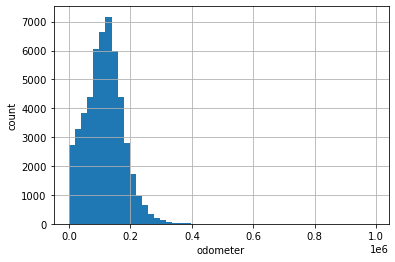

In [91]:
data['filled_odo'].plot(kind='hist', bins=50, grid=True)
plt.ylabel('count')
plt.xlabel('odometer')
plt.show()

**The histogram is skewed to the right.
<br>We can see in the histogram that we have outliers at the upper limit of the values.
<br>Most of our values fall below 300000 and we can see a peak around 140000, we cannot trust this histogram since the outliers make it difficult to read it properly.
<br>We have to deal with the outliers before we can make any rational assumptions or conclusions.**

## Cylinders

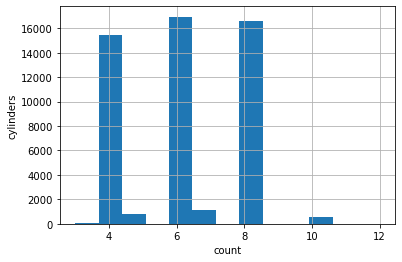

In [92]:
data['filled_cyl'].plot(kind='hist', grid=True, bins=13)
plt.ylabel('cylinders')
plt.xlabel('count')
plt.show()

**The histogram's distribution is multimodal, meaning we have more than two peaks.
<br>The histogram peaks at 4,6 and 8, those are the most common cylinders number for vehicle in our dataset.
<br>our outliers might be below 4 and above 8.**

In [93]:
data['filled_cyl'].value_counts()

6     16942
8     16557
4     15414
7      1136
5       808
10      550
3        96
9        20
12        2
Name: filled_cyl, dtype: int64

we can see that 4,6,8 are our main values and the other are insignificant.

## Condition

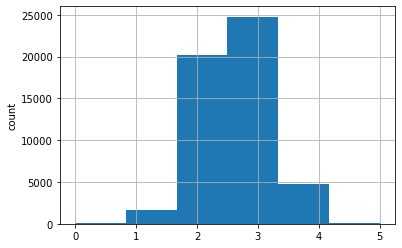

In [94]:
data['condition_id'].plot(kind='hist', bins=6, grid=True)
plt.ylabel('count')
plt.show()

**The histogram distributtion is a bit skewed to the left, we can see the values peak at around 3. our outliers are 5 and 0.
<br>Most of the observations are at 3 and 2.**

**The first 3 histograms are unreadable as they are, due to extreme outliers, to hanlde this we need to first determine what is considered an outlier and decide how to dispose it.**

#### Determine the upper limits of outliers :<a class="anchor" id="section_3_2">

**remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.**

column to be altered - 
- price
- age
- filled_odo
- filled_cyl
- condition_id

In [95]:
filt_data = data[['price', 'age', 'filled_odo', 'filled_cyl', 'condition_id','type', 'days_listed']]
Q1 = filt_data.quantile(0.25)
Q3 = filt_data.quantile(0.75)
IQR =Q3 - Q1
upper_limit = Q3+IQR*1.5
lower_limit = Q1-IQR*1.5
print('The IQR are:')
print(IQR)
print()
print('The upper limits are')
print(upper_limit)
print()
print('The lower limits are')
print(lower_limit)

The IQR are:
price           11839.0
age                 8.0
filled_odo      79518.0
filled_cyl          4.0
condition_id        1.0
days_listed        34.0
dtype: float64

The upper limits are
price            34597.5
age                 24.0
filled_odo      271802.0
filled_cyl          14.0
condition_id         4.5
days_listed        104.0
dtype: float64

The lower limits are
price          -12758.5
age                -8.0
filled_odo     -46270.0
filled_cyl         -2.0
condition_id        0.5
days_listed       -32.0
dtype: float64


##### we can see that the lower outliers boundry is actually 0 for most(since we don't have negative values anywhere), and 0.5 for 'condition_id'

In [96]:
# storing the filtered data in new df
filtered_data = filt_data.query('price<34597 & age<24 & filled_odo<271802 & filled_cyl<14 & 0.5<condition_id<4.5')

### Use the filtered data to plot new histograms :<a class="anchor" id="section_3_3">

**Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.**

## Price:

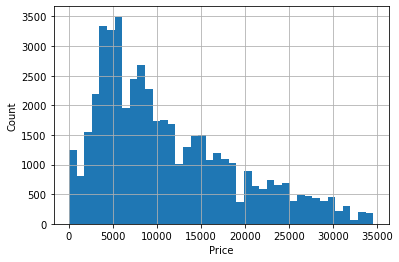

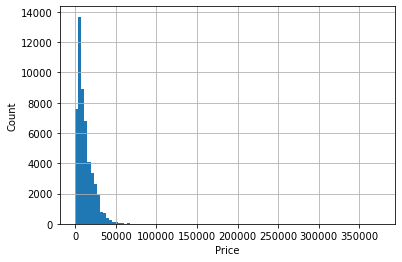

count    48216.000000
mean     11235.989879
std       7818.793826
min          1.000000
25%       5000.000000
50%       8995.000000
75%      15990.000000
max      34595.000000
Name: price, dtype: float64

In [97]:
#plotting histogram of the 'price' from the filtered data
filtered_data['price'].plot(kind='hist',grid=True,bins=40)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

#plotting histogram from the unfiltered data for comparison
data['price'].plot(kind='hist',bins=100, grid=True)
plt.ylabel('Count')
plt.xlabel('Price')
plt.show()

#using .describe to get a better grip at what we are seeing
filtered_data['price'].describe()


### The histogram is skewed to the right. it peaks at around 5,000 and steadily decreases as we go up in values.
### Most of the observations fall between 5000 to 16000.
the mean is about 20% larger than the median.

The "price" Q1 is 5000.0
The "price" Q3 is 16839.0
The "price" IQR is 11839.0
outliers boundries for "price" column are -6839.0 and 28678.0


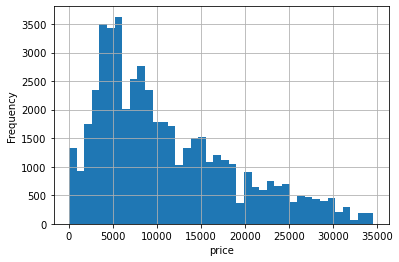

In [98]:
#another way to handle the task
price_q1 = data['price'].quantile(0.25)
price_q3 = data['price'].quantile(0.75)
price_iqr = price_q3 - price_q1
print('The "price" Q1 is', price_q1)
print('The "price" Q3 is', price_q3)
print('The "price" IQR is', price_iqr)
print('outliers boundries for "price" column are', (price_q1-price_iqr),'and', (price_q3+price_iqr))
data.query('(@price_q1-@price_iqr*1.5)<price<(@price_q3+@price_iqr*1.5)')['price'].plot(kind='hist', grid=True, bins=40)
plt.xlabel('price')
plt.show()

# Age:

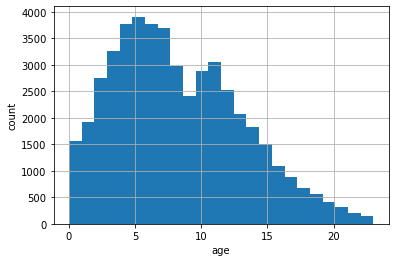

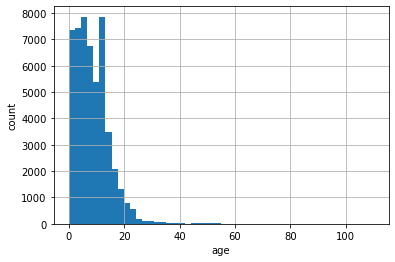

count    48216.000000
mean         8.130289
std          5.042155
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max         23.000000
Name: age, dtype: float64

In [99]:
#plotting histogram of the 'age' from the filtered data
filtered_data['age'].plot(kind='hist',grid=True,bins=24)
plt.xlabel('age')
plt.ylabel('count')
plt.show()

#plotting histogram from the unfiltered data for comparison
data['age'].plot(kind='hist', bins=50, grid=True)
plt.ylabel('count')
plt.xlabel('age')
plt.show()

#using describe() to get more details about the data
filtered_data['age'].describe()

**The histogram is skewed to the right and is almost bimodal since it peaks at age of 5 and again a smaller peak at age of 11.
<br>Most observations fall between age 4 to age 12. we have very little ads of cars over 12 years old.
<br>The mean and median are pretty close to each other.**

## Odometer:

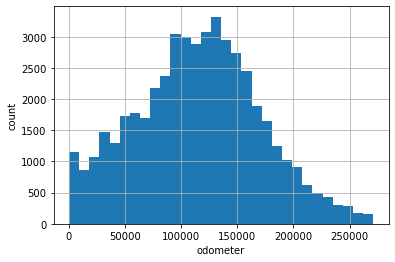

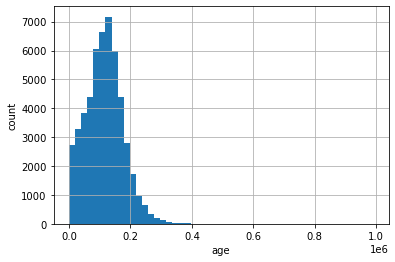

count     48216.000000
mean     115059.531504
std       55608.981341
min           0.000000
25%       76560.500000
50%      116226.500000
75%      152000.000000
max      271175.000000
Name: filled_odo, dtype: float64

In [100]:
#plotting histogram of the 'odometer' from the filtered data
filtered_data['filled_odo'].plot(kind='hist',grid=True,bins=30)
plt.xlabel('odometer')
plt.ylabel('count')
plt.show()

#plotting histogram from the unfiltered data for comparison
data['filled_odo'].plot(kind='hist', bins=50, grid=True)
plt.ylabel('count')
plt.xlabel('age')
plt.show()

#using describe() to get more details about the data
filtered_data['filled_odo'].describe()

**The histogram is bell shaped, pointing a normal distribution.
<br>Our values peak at around 130000. Another smaller peak at 90000. we can also detect a small peak at around zero, which can be axplained as a human error, advetisers that choose to not fill the odometer, or forgot to.
<br>The mean and median are practically the smae, which also indicates a normal distribution.**

# Cylinders:

#### The upper limit of filled_cyl is higher than the greatest value in the column, so no need to plot new histogram from filtered data, they will look the same

## Condition:

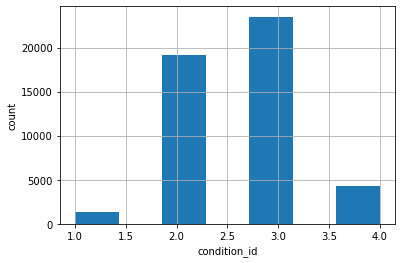

In [101]:
#plotting histogram of the 'condition_id' from the filtered data
filtered_data['condition_id'].plot(kind='hist',grid=True,bins=7)
plt.xlabel('condition_id')
plt.ylabel('count')
plt.show()

**Not much have changed, we still have a multimodal distribution.
<br>the 5 and 0 values are now gone. we can see most observation are at value 3 followed by value 2.
<br>this make sense that most ads will be of good and excellent condition, a seller will usually not admit that the car he is selling is of poor condition, and most cars out there are not new.**

**reminder of scale:**
 - 0 - salvage
 - 1 - fair
 - 2 - good
 - 3 - excellent
 - 4 - like new
 - 5 - new

### Study how many days advertisements were displayed :<a class="anchor" id="section_3_4">

**Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.**

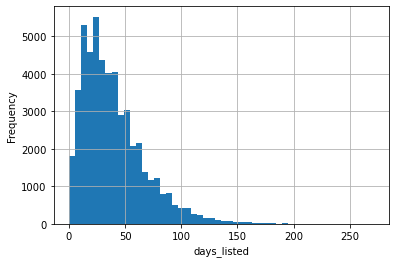

In [102]:
#plotting hist for days_listed
data['days_listed'].plot(kind='hist', bins=50, grid=True)
plt.xlabel('days_listed')
plt.show()

**The histogram is skewed to the right.
<br>We can see outliers in the upper limit. Most observations fall below 150 days listed.
<br>We need to get rid of the ouliers in order to get a better understanding of the distribution of this column.**

In [103]:
print('The mean value of days_listed is', data['days_listed'].mean())
print('The median value of days_listed is:', data['days_listed'].median())
print('The Q1 of days_listed is:', data['days_listed'].quantile(0.25))
print('The Q3 of days_listed is:', data['days_listed'].quantile(0.75))
print('The IQR of days_listed is:', (data['days_listed'].quantile(0.75) - data['days_listed'].quantile(0.25)))
print('The upper limit of days_listed is:', data['days_listed'].quantile(0.75) + (data['days_listed'].quantile(0.75) - data['days_listed'].quantile(0.25))*1.5)

The mean value of days_listed is 39.55475982532751
The median value of days_listed is: 33.0
The Q1 of days_listed is: 19.0
The Q3 of days_listed is: 53.0
The IQR of days_listed is: 34.0
The upper limit of days_listed is: 104.0


##### The mean is about 18% larger than the median, indicating some outliers in the upper limit.

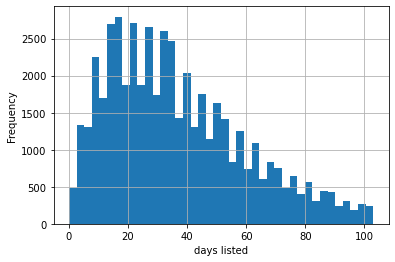

In [104]:
data.query('days_listed<104')['days_listed'].plot(kind='hist', grid=True, bins=40)
plt.xlabel('days listed')
plt.show()

**The histogram is skewed to the right.
<br>Observations peaks at around 18 days, and gradually declining as we go up in values. The decline in number of observations is minor up to around 36 days and than we can see a much more rapid decline in numbers.**

In [105]:
data.query('days_listed<104')['days_listed'].describe()

count    49824.000000
mean        36.559770
std         23.039761
min          0.000000
25%         18.000000
50%         32.000000
75%         51.000000
max        103.000000
Name: days_listed, dtype: float64

##### The mean is now about 12% larger than the median, it makes sense, as we saw the histogram was skewed to the right.

### Analyze the number of ads and the average price for each type of vehicle :<a class="anchor" id="section_3_5">

**Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.**

In [106]:
#number of ads per type
data['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

**SUV and truck types are the most popular**

In [107]:
#average price per type
data.groupby('type')['price'].agg('mean')

type
SUV            11149.400000
bus            17135.666667
convertible    14575.881166
coupe          14353.442901
hatchback       6868.513849
mini-van        8193.177433
offroad        14292.294393
other          10989.714844
pickup         16057.410418
sedan           6965.358647
truck          16734.894924
van            10546.941548
wagon           9088.134328
Name: price, dtype: float64

**SUV and bus types are the highest average price**

In [108]:
price_type = data.pivot_table(index='type', values='price', aggfunc=('count', 'mean'))

In [109]:
price_type.sort_values('count', ascending=False)

,count,mean
type,,
SUV,12405.0,11149.400000
truck,12353.0,16734.894924
sedan,12154.0,6965.358647
pickup,6988.0,16057.410418
coupe,2303.0,14353.442901
wagon,1541.0,9088.134328
mini-van,1161.0,8193.177433
hatchback,1047.0,6868.513849
van,633.0,10546.941548


In [110]:
price_type.sort_values('mean', ascending=False)

,count,mean
type,,
bus,24.0,17135.666667
truck,12353.0,16734.894924
pickup,6988.0,16057.410418
convertible,446.0,14575.881166
coupe,2303.0,14353.442901
offroad,214.0,14292.294393
SUV,12405.0,11149.400000
other,256.0,10989.714844
van,633.0,10546.941548


**the most popular type is SUV and is only no. 7 in average price. the truck type is second most populer and the second highest average price.**

<AxesSubplot:xlabel='type'>

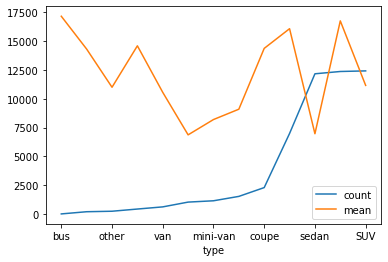

In [111]:
#plotting a graph showing the dependence of number of ads on the type.
price_type.sort_values('count').plot()

#### The blue line shows the number of ads, the y axis indicates the type of vehicle and the x axis indicates number of ads.
#### we can see that SUV has the most ads, followed by truck and sedan, all three are pretty similar in number of ads.
#### than we can see a plummet in number of ads when we get to coupe, contuining to stadily decline as we go on to mini-van, van, other and bus.

<AxesSubplot:>

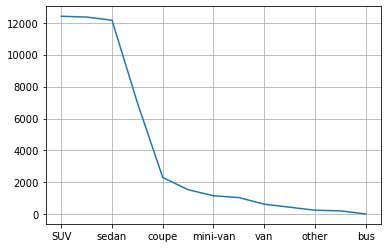

In [112]:
# same graph without the mean price of type.
data['type'].value_counts().plot(grid=True)

### What factors impact the price most? <a class="anchor" id="section_3_6">

**Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.**

check dependence of **price** on:
- age
- mileage
- condition
- transmission
- type
- color

In [113]:
#import library for visualization of the correlation
import seaborn as sns

In [114]:
# constracting data frame without outliers that include all columns
final_data = data.query('10<price<34597 & age<24 & 10<filled_odo<271802 & filled_cyl<14 & 0.5<condition_id<4.5 & days_listed<104')

In [115]:
# dropping all types but the two most popular, saving the result to final_two
final_SUV = final_data.query('type == "SUV"')
final_truck = final_data.query('type == "truck"')
final_two = final_data.query('type == "SUV" or type == "truck"')

In [116]:
#building pivot table with index age and values are price's count and mean.
price_age_SUV = final_SUV.pivot_table(index='age', values='price', aggfunc=('count', 'mean'))
price_age_truck = final_truck.pivot_table(index='age', values='price', aggfunc=('count', 'mean'))

Text(0, 0.5, 'price_SUV')

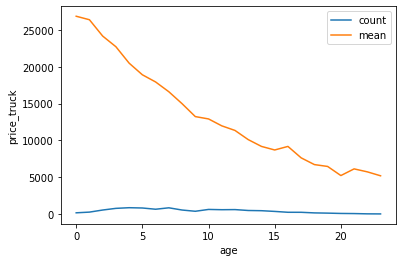

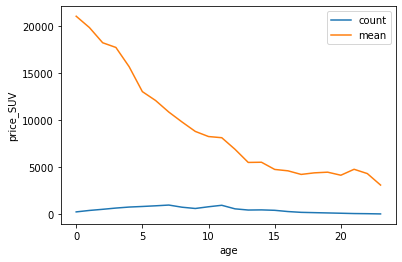

In [117]:
price_age_truck.plot()
plt.ylabel('price_truck')
price_age_SUV.plot()
plt.ylabel('price_SUV')

**we can see that the older the car is the lower the average price is, for both types**

### SUV type correlation heat map:

<AxesSubplot:>

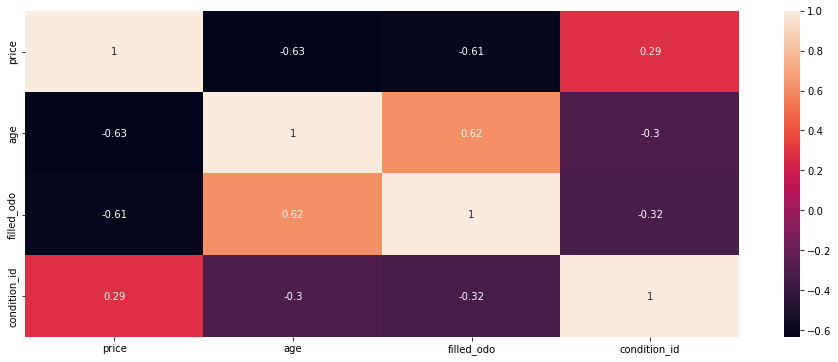

In [118]:
#building a heat map of correlation for SUV type
correlation_matrix = final_SUV[['price', 'age', 'filled_odo', 'condition_id']].corr()
plt.figure(figsize=(16,6))
sns.heatmap(correlation_matrix, annot=True)

we can see **negative correlation** between **price** and **age & mileage.**
the **correlation** between **price** and **condition** is **small**, but exist.

### Truck type correlation heat map:

<AxesSubplot:>

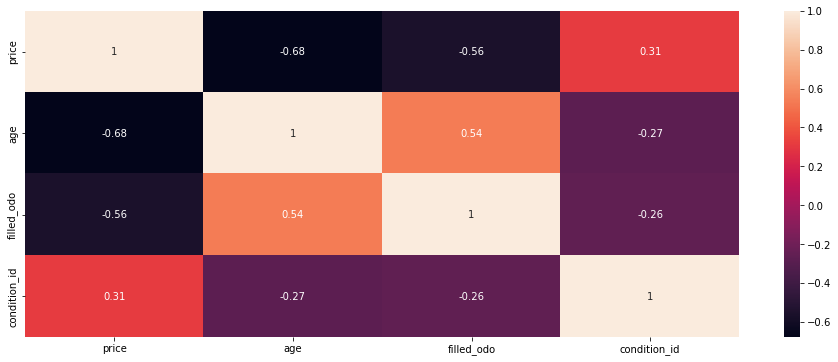

In [119]:
#building a heat map of correlation for truck type
correlation_matrix = final_truck[['price', 'age', 'filled_odo', 'condition_id']].corr()
plt.figure(figsize=(16,6))
sns.heatmap(correlation_matrix, annot=True)

same as in SUV type- we can see **negative correlation** between **price** and **age & mileage.**
the **correlation** between **price** and **condition** is **small**, but exist.

## bulding scatterplots for the quantative varibales

#### SUV Scatterplots:

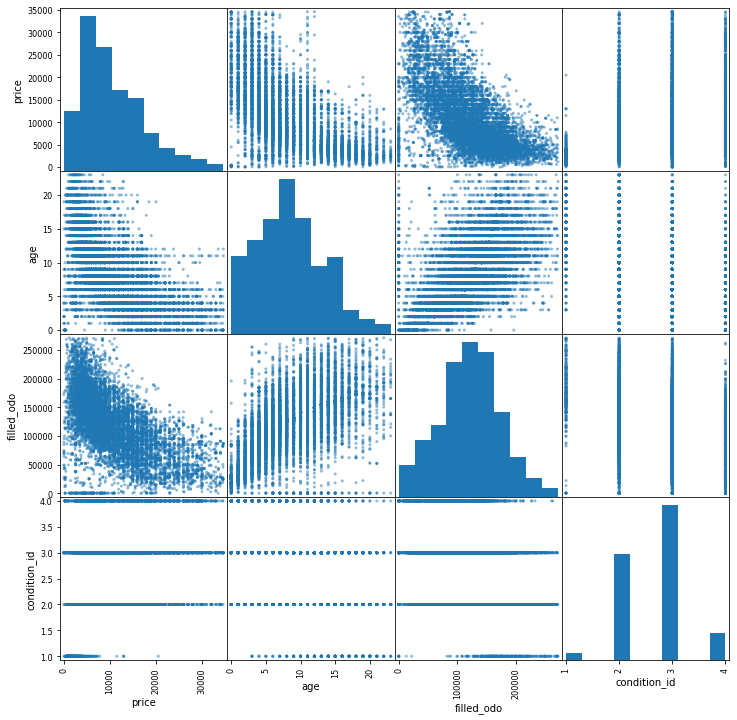

In [132]:
#starting with SUV scatterplots
pd.plotting.scatter_matrix(final_SUV[['price', 'age', 'filled_odo', 'condition_id']], alpha=0.5, grid=True, diagonal='hist', figsize=(12,12));

#### Truck Scatterplots:

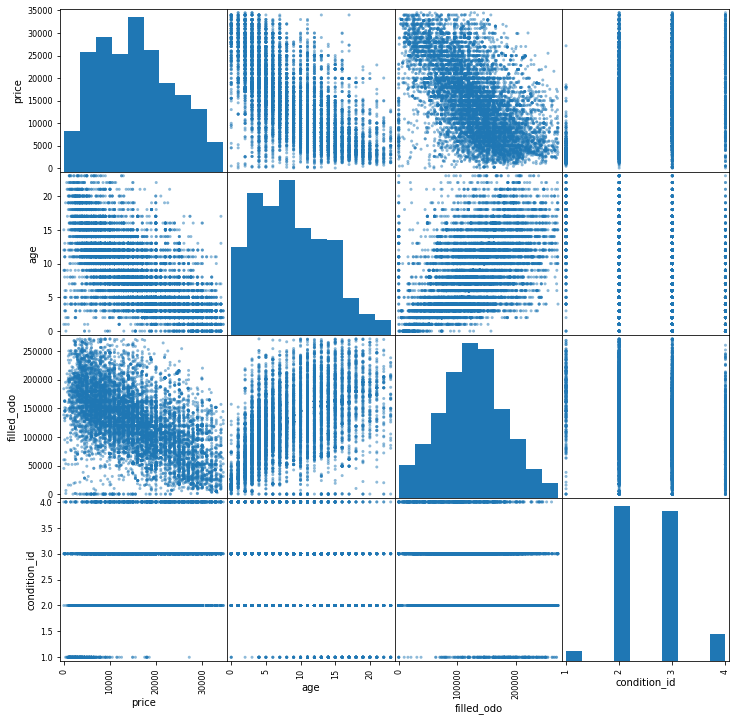

In [133]:
#scatterplots for truck type
pd.plotting.scatter_matrix(final_truck[['price', 'age', 'filled_odo', 'condition_id']], alpha=0.5, grid=True, diagonal='hist', figsize=(12,12));

**same conclusion as with the heat map, for both SUV and truck type
<br>we can see correlation between price and age, odometer and a small correlation to condition.
<br>meaning : the higher the age and odometer are, the lower the price is expected to be. the better the condition, the higher the price is expected to be.**

## building boxplots for categorical variables

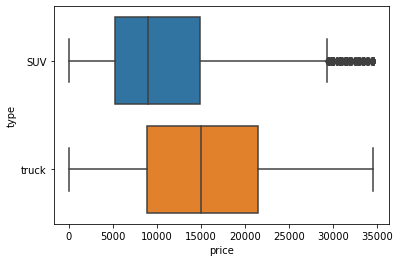

In [134]:
#building boxplot for type
sns.boxplot(x='price', y='type', data=final_two);

**we can see that truck type is on the higher side of prices, and that SUV have outliers in the upper limit.
<br>the truck price in more evenly distributed across the data, since its median is in the middle of the IQR.
<br>the SUV median price is in the lower end of the IQR, we can see some outliers in  the upper limit which explains the median position, as the outliers draw the mean upwards.**

## Boxplot for color:

#### first i will find categories with less than 50 abservations if there are any:

In [123]:
final_SUV['paint_color'].value_counts()

unspecified    2001
black          1962
white          1759
silver         1448
grey           1108
blue            947
red             834
green           398
brown           332
custom          260
orange           78
purple           39
yellow           39
Name: paint_color, dtype: int64

In [124]:
final_truck['paint_color'].value_counts()

white          3126
unspecified    1814
black          1295
red             897
silver          885
grey            799
blue            779
custom          269
green           244
brown           212
yellow           64
orange           44
purple           13
Name: paint_color, dtype: int64

**For SUV type I will drop the color purple and yellow. For truck type i will drop the colors orange and purple.**

## SUV color boxplot:

unspecified    2001
black          1962
white          1759
silver         1448
grey           1108
blue            947
red             834
green           398
brown           332
custom          260
orange           78
Name: paint_color, dtype: int64

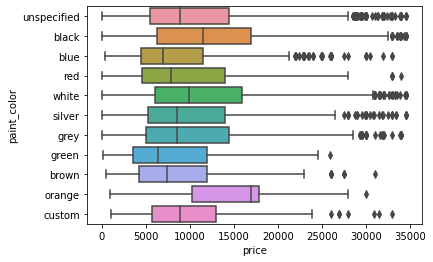

In [125]:
#building boxplot for color, SUV type
color_suv = final_SUV.query('paint_color != ("yellow", "purple")')
sns.boxplot(x='price', y='paint_color', data=color_suv)
color_suv['paint_color'].value_counts()

## Truck color boxplot:

<AxesSubplot:xlabel='price', ylabel='paint_color'>

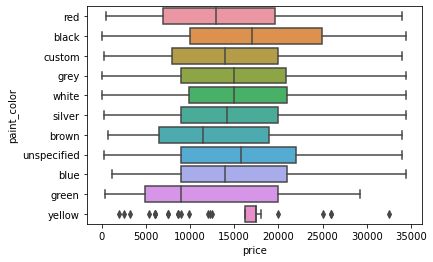

In [126]:
#building boxplot for color, truck type
color_truck = final_truck.query('paint_color != ("orange", "purple")')
color_truck['paint_color'].value_counts()
sns.boxplot(x='price', y='paint_color', data=color_truck)

**the most expensive color usually is black (make sense, since the majority of people buy black cars)
<br>for SUV the orange color is even more expensive, followed by the black color.**

the "cheapest" color is green followed by brown and purple (makes a lot of since).

## Boxplot for transmission:

<AxesSubplot:xlabel='price', ylabel='transmission'>

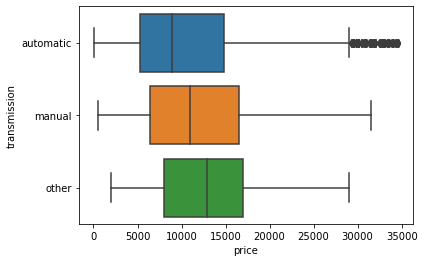

In [127]:
#plotting boxplot for transmission type for SUV
sns.boxplot(x='price', y='transmission', data=final_SUV);

#### automatic is the cheapest transmission, which is suprising since we expect to see the automatic more expensive than manual, maybe a value count can tell us something about that difference.

In [128]:
final_SUV['transmission'].value_counts()

automatic    10674
manual         442
other           89
Name: transmission, dtype: int64

#### ok, so there are far less manual SUV ads out there, so that makes sense they will be more expensive, since gthey are more rare. plus, because there are fewer values, they can be more influanced by extreme values.

<AxesSubplot:xlabel='price', ylabel='transmission'>

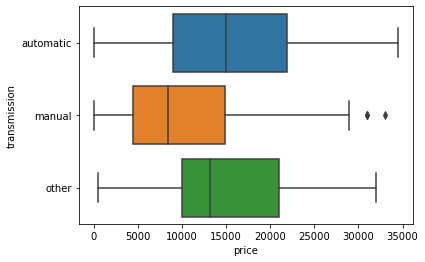

In [129]:
#plotting boxplot for transmission type for truck
sns.boxplot(x='price', y='transmission', data=final_truck)

#### for the truck type the automatic is more expensive than the manual, and is almost tied with others.
let's check the value count here too.

In [130]:
final_truck['transmission'].value_counts()

automatic    10006
manual         362
other           73
Name: transmission, dtype: int64

so, other is pretty insignificant for us, most listings are automatic, which makes sense.

### Final conclusion <a class="anchor" id="chapter4">


**WE tried to study the factors that impact the price the most**
<br>**for both of the most popular types, the factors are similar**
- the higher the mileage, the lower the price.
- the bigger the age is, the lower the price.
- the condition actually dont correlate as much with the price, which is a bit of a surprise. (corr - 0.31), still, the better the condition, the higher the price.
- the most expensive color for both types is black (no surprise), for SUV joins the orange color.
- the least expensive colors for both are green and brown.
- the automatic transmission is more expensive for truck type and the other way for SUV type.

**highest correlation rate is between price and age followed by price and mileage**
<br>so we can say that the factors that impact the most on the price are the age and mileage.
<br>smaller impact factors are the condition and the transmission type.